In [25]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [26]:

#fn = '/home/jovyan/orders/Daymet_Daily_V4/data/daymet_v4_daily_na_prcp_1980.nc'

fn = '/home/jovyan/orders/Daymet_V4_Annual_Climatology/data/daymet_v4_prcp_annttl_na_1980.nc'


In [27]:
data = Dataset(fn, 'r')

In [28]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    start_year: 1980
    source: Daymet Software Version 4.0
    Version_software: Daymet Software Version 4.0
    Version_data: Daymet Data Version 4.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    dimensions(sizes): time(1), nv(2), y(8075), x(7814)
    variables(dimensions): float32 time_bnds(time, nv), int16 lambert_conformal_conic(), float32 lat(y, x), float32 lon(y, x), float32 prcp(time, y, x), float32 time(time), float32 x(x), float32 y(y)
    groups: 

In [29]:
print( data['time'] )

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    calendar: standard
    units: days since 1950-01-01 00:00:00
    bounds: time_bnds
    long_name: 24-hour day based on local time
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [30]:
prcp = data['prcp']
x = data['x'][:]
y = data['y'][:]
type(prcp), type(x), type(y)

(netCDF4._netCDF4.Variable,
 numpy.ma.core.MaskedArray,
 numpy.ma.core.MaskedArray)

In [31]:
x, y
lon = data['lon'][:]
lat = data['lat'][:]
print( np.min( lon ), np.max( lon) )
print( lon[4000, :] )

-179.9999 179.99992
[-157.3429   -157.33392  -157.32495  ...  -55.829784  -55.818596
  -55.807415]


In [32]:
pr = data['prcp'][:]
type( pr )

numpy.ma.core.MaskedArray

In [33]:
print( x[4000], y[3500] )

-560250.0 1484000.0


In [34]:
print( prcp[0, 4000:4002, 3500:3502] )
prcp

[[1088.97  898.2 ]
 [1001.81  919.87]]


<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    _FillValue: -9999.0
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: sum within days time: sum over days
    units: mm
    long_name: annual total precipitation
unlimited dimensions: time
current shape = (1, 8075, 7814)
filling on

In [35]:
pr.shape

(1, 8075, 7814)

In [36]:
print( np.min( pr[0, :, :] ), np.max( pr[0, :, :] ))

0.0 8022.27


<Figure size 1500x1500 with 0 Axes>

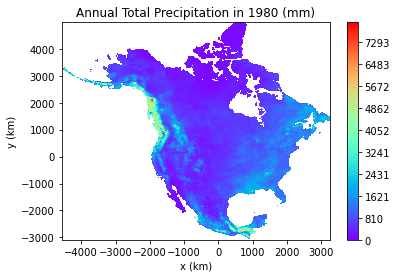

In [37]:
# plot

plt.figure(dpi=300, figsize=(5, 5))

fig, ax = plt.subplots(nrows=1, ncols=1)

levels = np.linspace(np.min(pr[0, :, :]), np.max(pr[0, :, :]), 100)

cs = ax.contourf(x*0.001, y*0.001, pr[0, :, :], cmap = 'rainbow', levels=levels)

#cs = ax.contourf(x[2500:7000]*0.001, y[3500:8075]*0.001, pr[0, 3500:8075, 2500:7000], cmap = 'rainbow', levels=levels)

#cs = ax.contourf(lon, lat, pr[0, :, :], cmap = 'rainbow', levels=levels)

plt.title('Annual Total Precipitation in 1980 (mm)')
plt.xlabel('x (km)')
plt.ylabel('y (km)')

plt.colorbar(cs)

plt.savefig('prcp_1980.png', dpi=300)

plt.show()

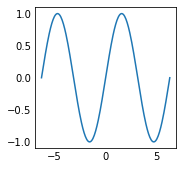

In [80]:
xx = np.linspace( -2*np.pi, 2*np.pi, 200)
plt.plot(xx, np.sin(xx))